## WOA Dissolved Oxygen: 
The total amount of dissolved oxygen in the ocean. This can fluctuate based on geochemical processes like marine productivity, oxidation, and respiration. It is also controlled by processes like gas solubility, mixing at depths, and anthropogenic effects. WOA provides dissolved O2 on different time scales. 

## WOA Apparent Oxygen Utilization: 
% oxygen satuation minus actual dissolved oxygen. 

## WOA Percent Oxygen Saturation: 
The actual amount of dissolved oxygen in the ocean vs maximum amount.

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

In [7]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

In [8]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [9]:
#separating all the ocean basins
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) 
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

Text(0.5, 1.0, 'Ocean Basin Mask')

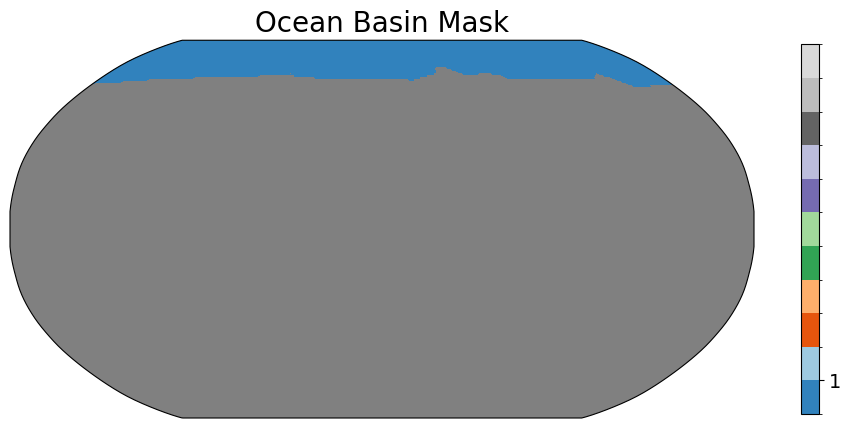

In [10]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [11]:
woa18_aou_arctic = woa18_aou*arcticocean
woa18_o2_arctic = woa18_o2*arcticocean
woa18_o2sat_arctic = woa18_o2_sat*arcticocean

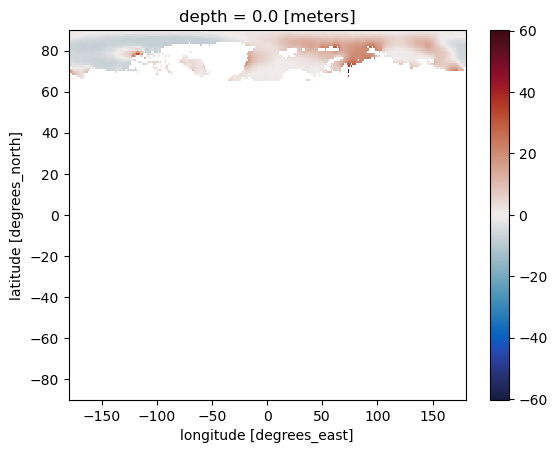

In [12]:
woa18_aou_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

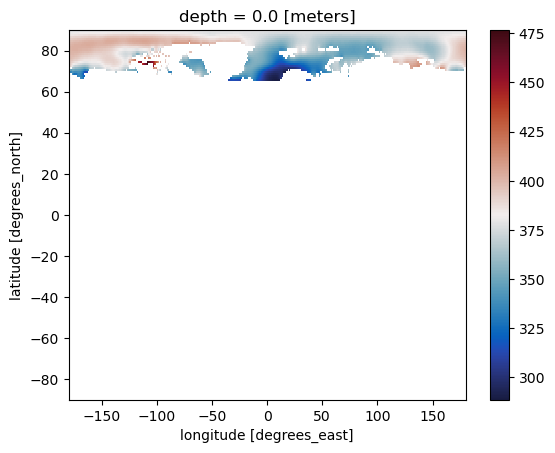

In [13]:
woa18_o2_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

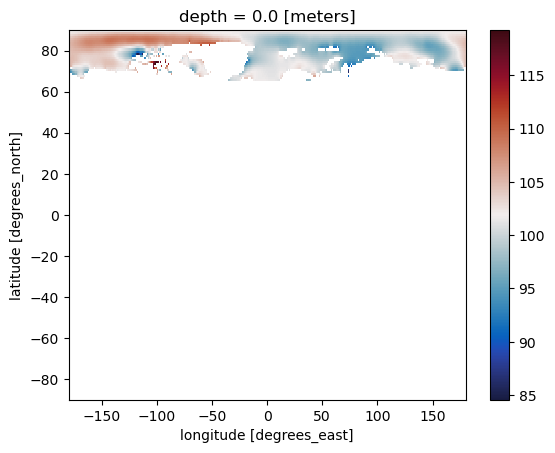

In [14]:
woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

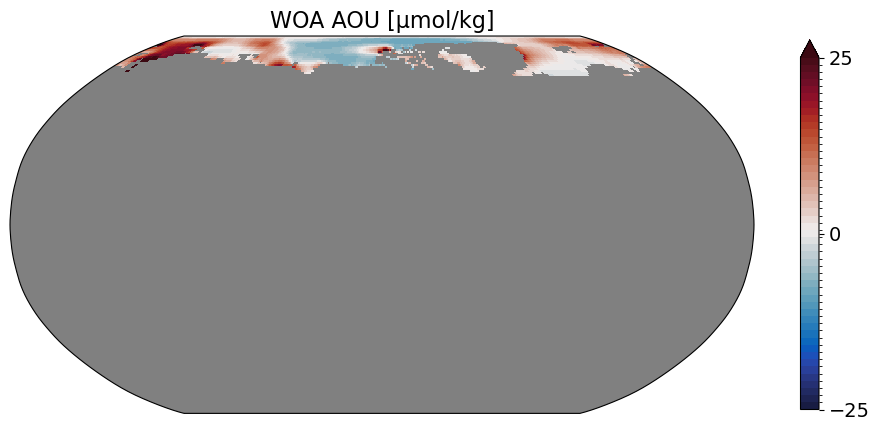

In [15]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-25, vmax=25, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 [μmol/kg]')

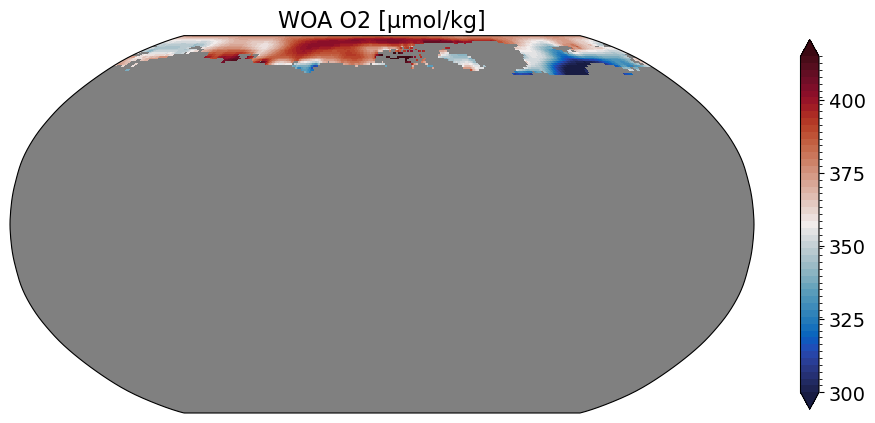

In [16]:
#arctic dissolved oxygen map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=300, vmax=415, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[300,325,350,375,400,425], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat [μmol/kg]')

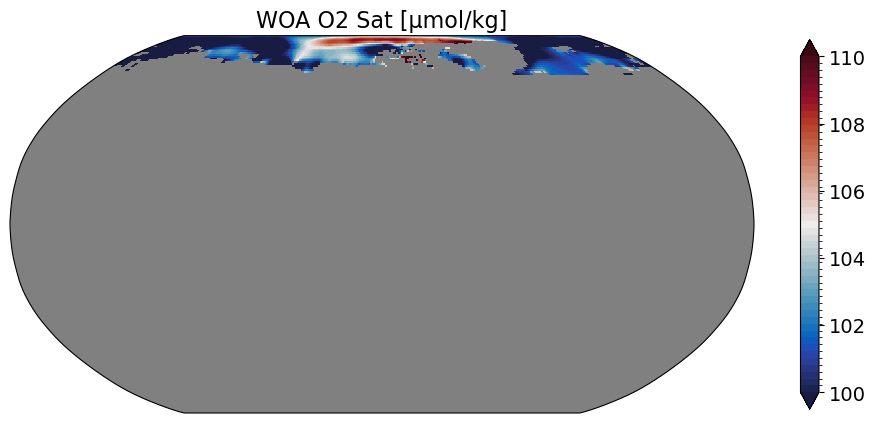

In [48]:
#arctic oxygen saturation map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=100, vmax=110, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[100,102,104,106,108,110], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'Ocean Basin Mask')

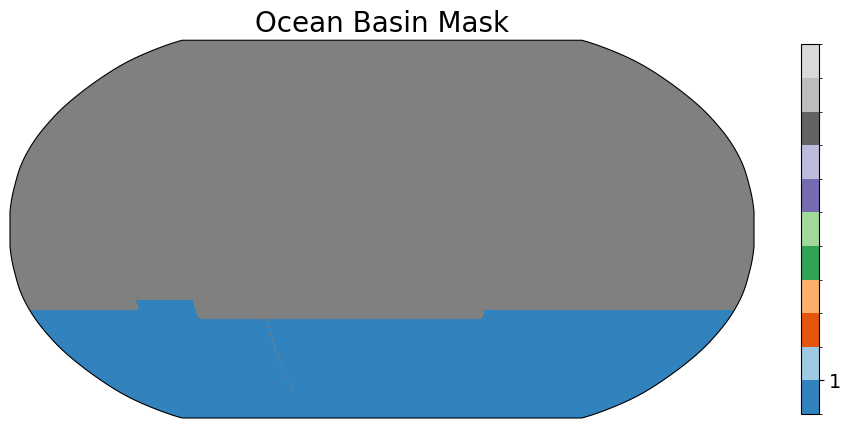

In [14]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [18]:
woa18_aou_southernocean = woa18_aou*southernocean
woa18_o2_southernocean = woa18_o2*southernocean
woa18_o2sat_southernocean = woa18_o2_sat*southernocean

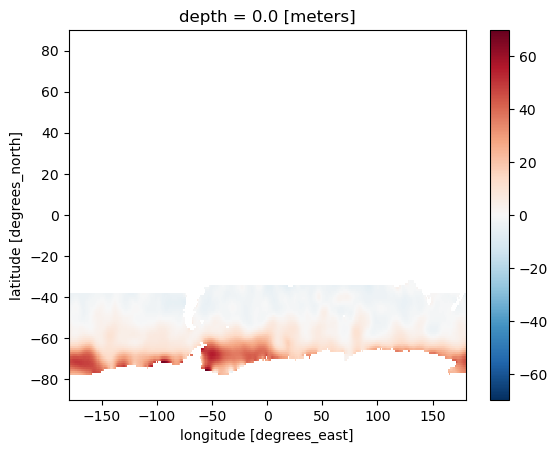

In [19]:
woa18_aou_southernocean.isel(depth=0).plot()

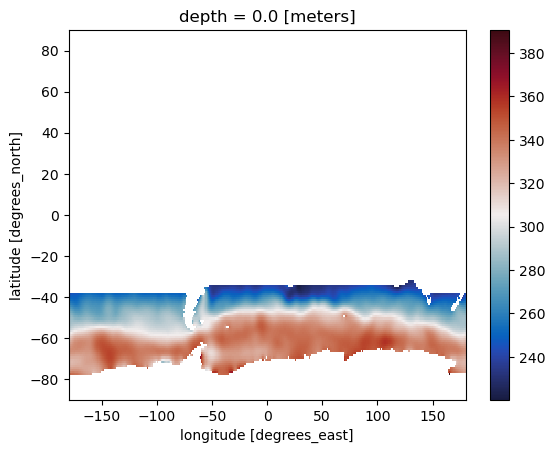

In [23]:
woa18_o2_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

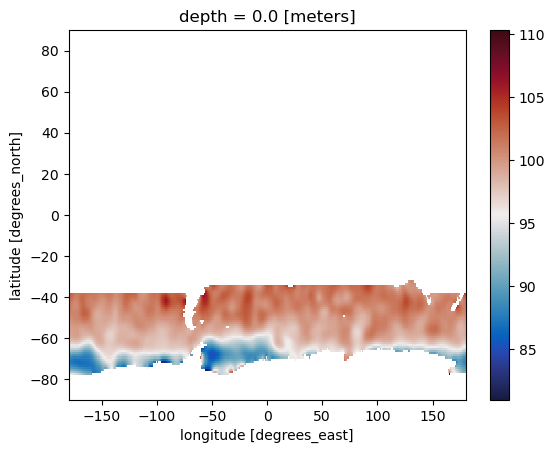

In [24]:
woa18_o2sat_southernocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [26]:
woa18_aou_atlanticocean = woa18_aou*atlanticocean
woa18_o2_atlanticocean = woa18_o2*atlanticocean
woa18_o2sat_atlanticocean = woa18_o2_sat*atlanticocean

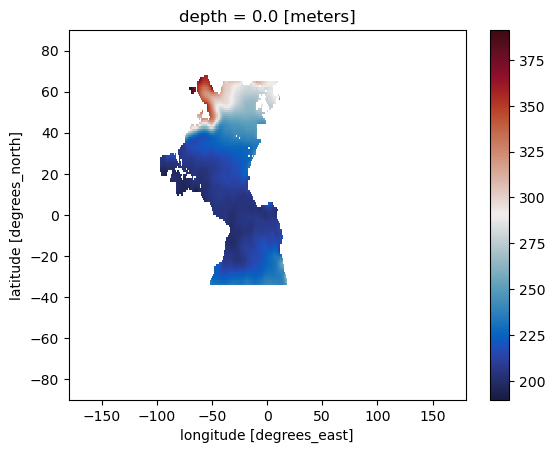

In [27]:
woa18_o2_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

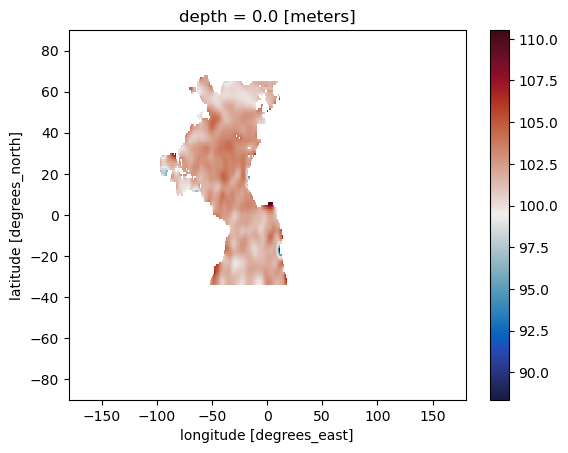

In [28]:
woa18_o2sat_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

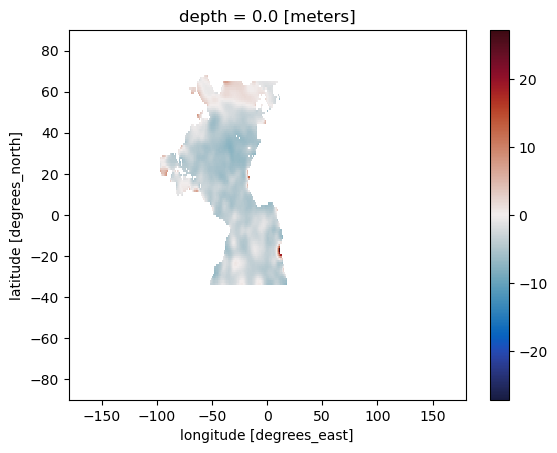

In [29]:
woa18_aou_atlanticocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [30]:
woa18_aou_pacificocean = woa18_aou*pacificocean
woa18_o2_pacificocean = woa18_o2*pacificocean
woa18_o2sat_pacificocean = woa18_o2_sat*pacificocean

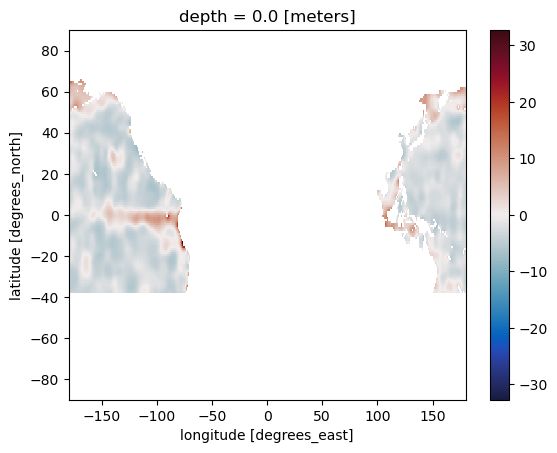

In [31]:
woa18_aou_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

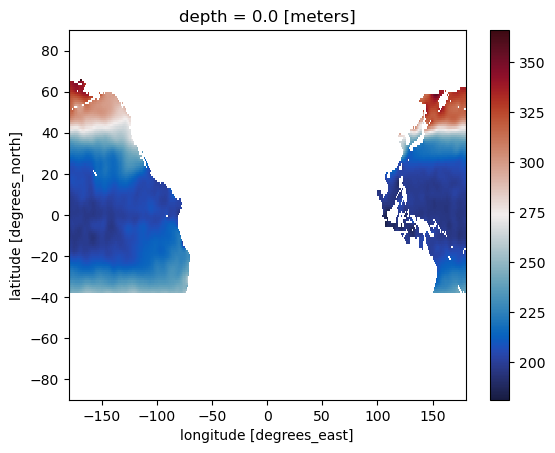

In [32]:
woa18_o2_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

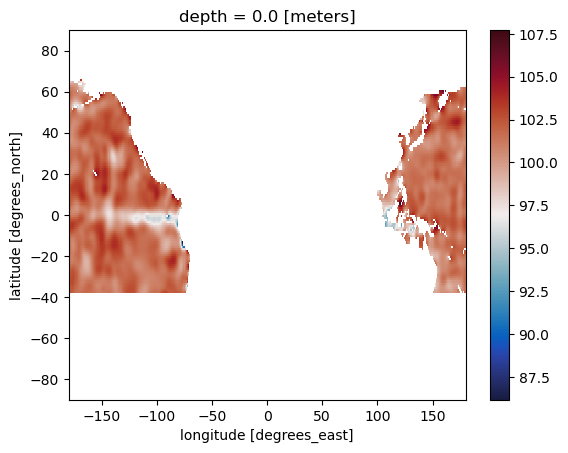

In [33]:
woa18_o2sat_pacificocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

In [34]:
woa18_aou_indianocean = woa18_aou*indianocean
woa18_o2_indianocean = woa18_o2*indianocean
woa18_o2sat_indianocean = woa18_o2_sat*indianocean

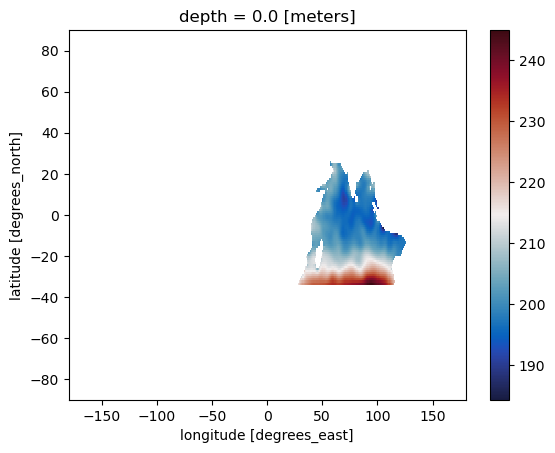

In [35]:
woa18_o2_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

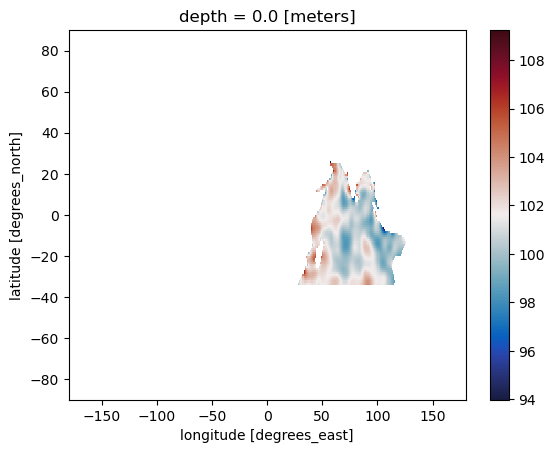

In [36]:
woa18_o2sat_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)

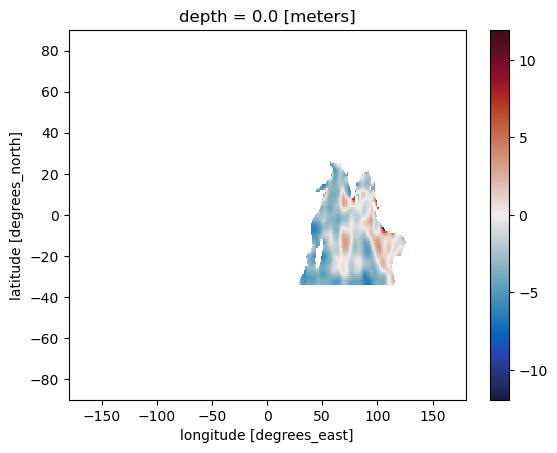

In [37]:
woa18_aou_indianocean.isel(depth=0).plot(cmap=cmocean.cm.balance)